 # <span style = 'color : Green' > Multiple Linear Regression
 # <span style = 'color : Green' > Bike Sharing Assignment

##### By : Debasish Deaty

##### Date : 3rd Oct 2023


# INTRODUCTION


## Overview

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

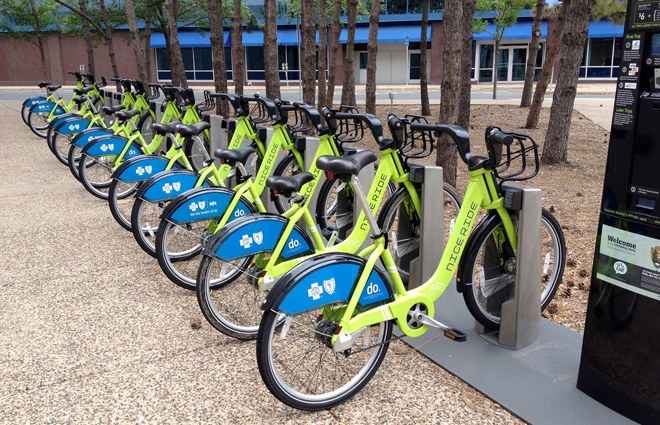

## Feature Description
The data set consists a spreadsheets **day.csv** have the following fields:  

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from https://usoas.usmission.gov/holiday-calendar/ & 
                                                            https://www.commerce.gov/hr/employees/leave/holidays)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered
    

## **Problem Statement**<br>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


**They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends.**

**Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.**

**The company wants to know:**

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands <br>

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

The goal of this project is to combine the historical bike usage patterns with the weather data in order to forecast bike rental demand. 

+ Target Column to be predicted: 'count'
+ Input Columns used as variables (8 columns): ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
    * The other two columns (casual and registered) comprises of the split-up of the target column 'count'. 
    
## Motivation

Several bike/scooter ride sharing facilities (e.g., Bird, Capital Bikeshare, Citi Bike) have started up lately especially in metropolitan cities like San Francisco, New York, Chicago and Los Angeles, and one of the most important problem from a business point of view is to predict the bike demand on any particular day. While having excess bikes results in wastage of resource (both with respect to bike maintenance and the land/bike stand required for parking and security), having fewer bikes leads to revenue loss (ranging from a short term loss due to missing out on immediate customers to potential longer term loss due to loss in future customer base), Thus, having a estimate on the demands would enable efficient functioning of these companies.

# <span style = 'color : green' > 0). Importing Libraries

## 0.1. Importing Required Libraries

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.8)

## 0.2. Importing Warning Library to ignore warnings from displaying on UI

In [4]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

## 0.3. Importing StatsModel Library for displaying detailed information about model

In [5]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 0.4. Importing Scikit Library for evaluating requirement specific parameters and performing preprocessing steps (like Splitting & Scaling)

In [6]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

## 0.5. Other Misc Libraries (needed at runtime)

In [7]:
import datetime
from scipy.stats import pearsonr

# <span style = 'color : green' > 1). Reading and Understanding the Data
## 1.1 Read Bike Sharing Dataset file that is "day.csv" as bike

In [8]:
bikeSharing_df = pd.read_csv("day.csv")

## 1.2 Exploratory Data Analysis - Check the head of the dataset

In [9]:
# Check the head of the dataset
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 1.3 Inspecting the Dataset

In [10]:
bikeSharing_df.shape

(730, 16)

## 1.4 Check the descriptive information

In [11]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
bikeSharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Observation: 

Dataset has 730 rows and 16 columns.

Except one column that is "dteday", all other are either float or integer type.

One column is date type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

## 1.5 Data Quality Check
##### Check for NULL/MISSING values

In [13]:
# percentage of missing values in each column
round(100*(bikeSharing_df.isnull().sum()/len(bikeSharing_df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [14]:
# percentage of missing values in each row
round((bikeSharing_df.isnull().sum(axis=1)/len(bikeSharing_df))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

### Observation: 
There are no missing / Null values either in columns or rows

## 1.5 Checking for duplicate values

In [15]:
#### Checking for duplicate values

bike_dup = bikeSharing_df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

In [16]:
bikeSharing_df.shape

(730, 16)

### Observation: 
The shape after running the drop duplicate command is same as the original dataframe.
###### Hence we can conclude that there were zero duplicate values in the dataset.

## 1.6 Data Cleaning

Checking value_counts() for entire dataframe.

This will help to identify any Unknown/Junk values present in the dataset.

Create a copy of the  dataframe, without the 'instant' column,as this will have unique values, and donot make sense to do a value count on it.

In [17]:
bike_dummy=bikeSharing_df.iloc[:,1:16]

In [18]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 



1    499
0    231
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625

### Observation: 
There seems to be no Junk/Unknown values in the entire dataset.

### 1.6.1 Removing redundant & unwanted columns that are not useful for analysis

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

- instant : Its only an index value , we have a default index for the same purpose

- dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we can carry out our analysis without this column .

- casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

<span style='background: lightGreen '> We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation </span>

In [19]:
bikeSharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Before dropping date, let us introduce a **days_old** variable which indicates how old is the business

In [20]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
bikeSharing_df['days_old'] = (pd.to_datetime(bikeSharing_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [21]:
#Inspect once
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


**Droping the 'instant', 'dteday', 'casual' & 'registered' columns below:**

Droping instant column as it is index column which has nothing to do with target
Dropping dteday as we have already have month and weekday columns to work with
Dropping casual and registered columns as we have cnt column which is sum of the both that is the target column

In [22]:
# Droping instant column as it is index column which has nothing to do with target
bikeSharing_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bikeSharing_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bikeSharing_df.drop(['casual'], axis = 1, inplace = True)
bikeSharing_df.drop(['registered'], axis = 1, inplace = True)

**Inspect data frame after dropping**

In [23]:
#Inspect data frame after dropping
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [24]:
bikeSharing_df.shape

(730, 13)

In [25]:
# Check the datatypes before Visualising the Data
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [26]:
bikeSharing_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [27]:
bikeSharing_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [28]:
bikeSharing_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534,-0.000023
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542,-0.004619
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


### Observation: 
- we can see that features like `season, mnth, weekday and  weathersit` are integers although they should be non-numerical categories.

### 1.6.2 Handle Missing values

In [29]:
bikeSharing_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

#### Observation: 
There are no null values.

### 1.6.1 Handle Outliers

In [30]:
### Handle Outliers
bikeSharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [31]:
#Print number of unique values in all columns
bikeSharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

### 1.6.2 Draw the box plots for indepent variables with continuous values

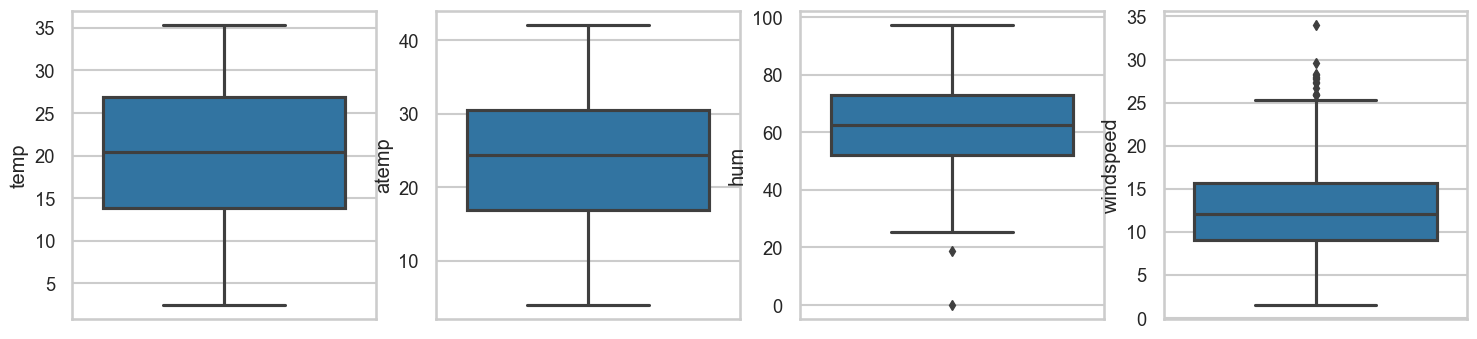

In [32]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_df)
    i+=1

#### Observation:
From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

# <span style = 'color : green' > 2). EDA - Visualising the Data

### 2.1 Convert season and  weathersit to categorical types

In [33]:
bikeSharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikeSharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikeSharing_df.mnth = bikeSharing_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikeSharing_df.weekday = bikeSharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


#### Here we'll do the following tasks:
- We would be able to check if all the variables are linearly related or not (important if we want to proceed with a linear model)
- Checking if there are any multicollinearity that exist
- Here's where we can also identify if some predictors directly have a strong association(correlation) with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

### 2.2 Draw pair Plots to check the linear relationship

<Figure size 1600x3200 with 0 Axes>

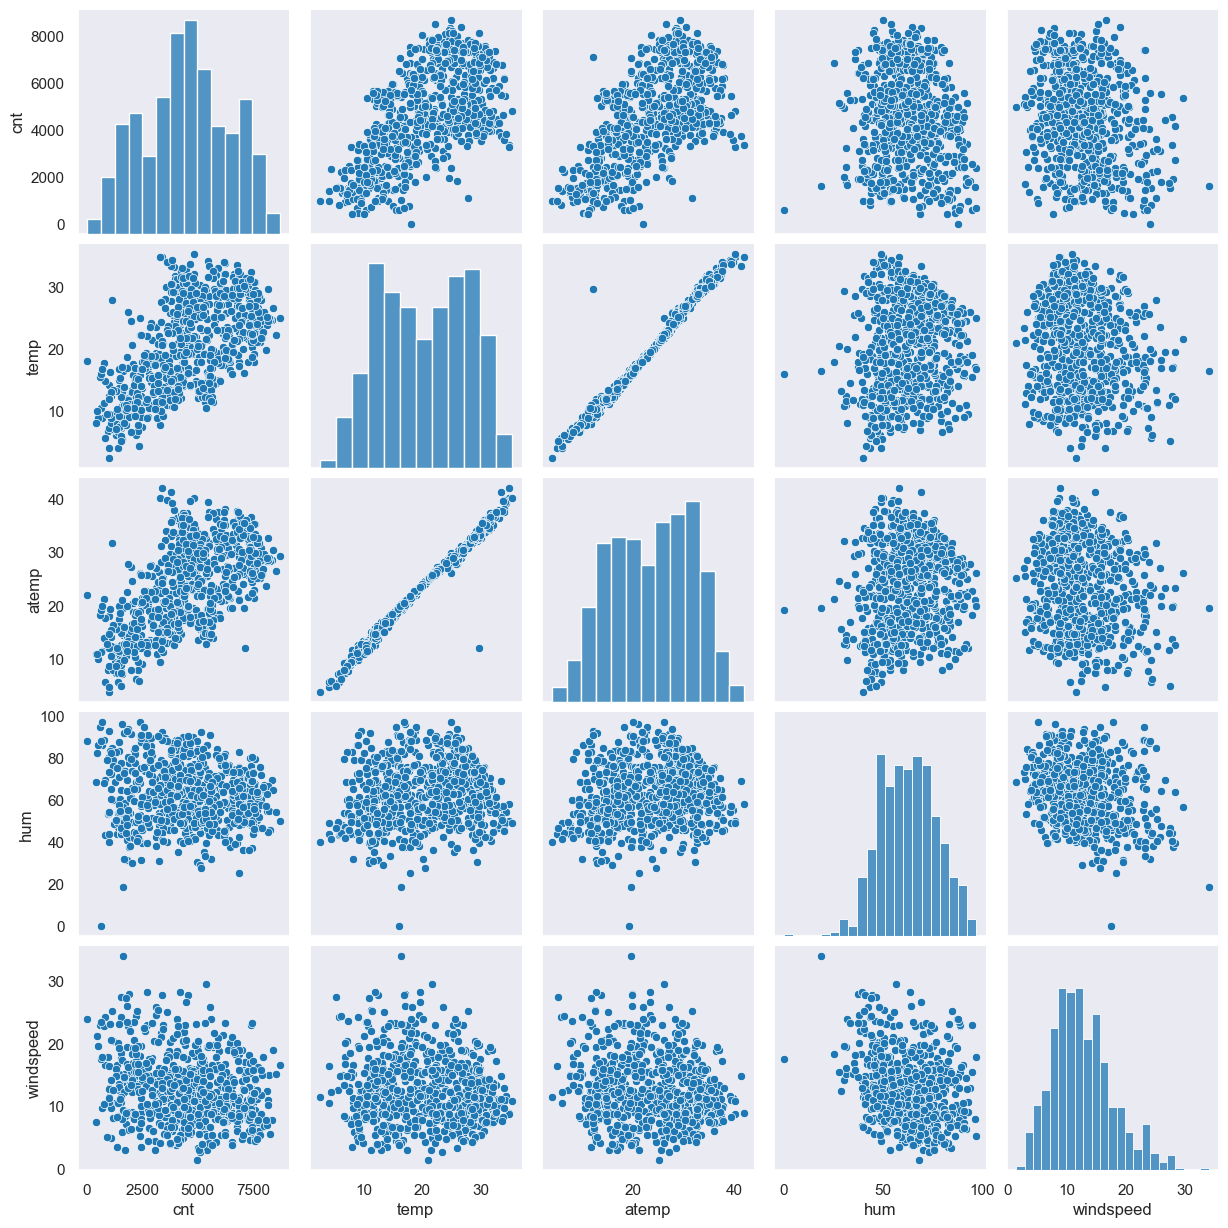

In [34]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (16,32))
sns.set(style='dark',)
sns.set_palette("tab10")
sns.pairplot(data=bikeSharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Observation: 
- Looks like the temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other
#### As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp. 

### 2.3 Visualising the Data to Find the Correlation between the Numerical Variable

<Figure size 2200x1600 with 0 Axes>

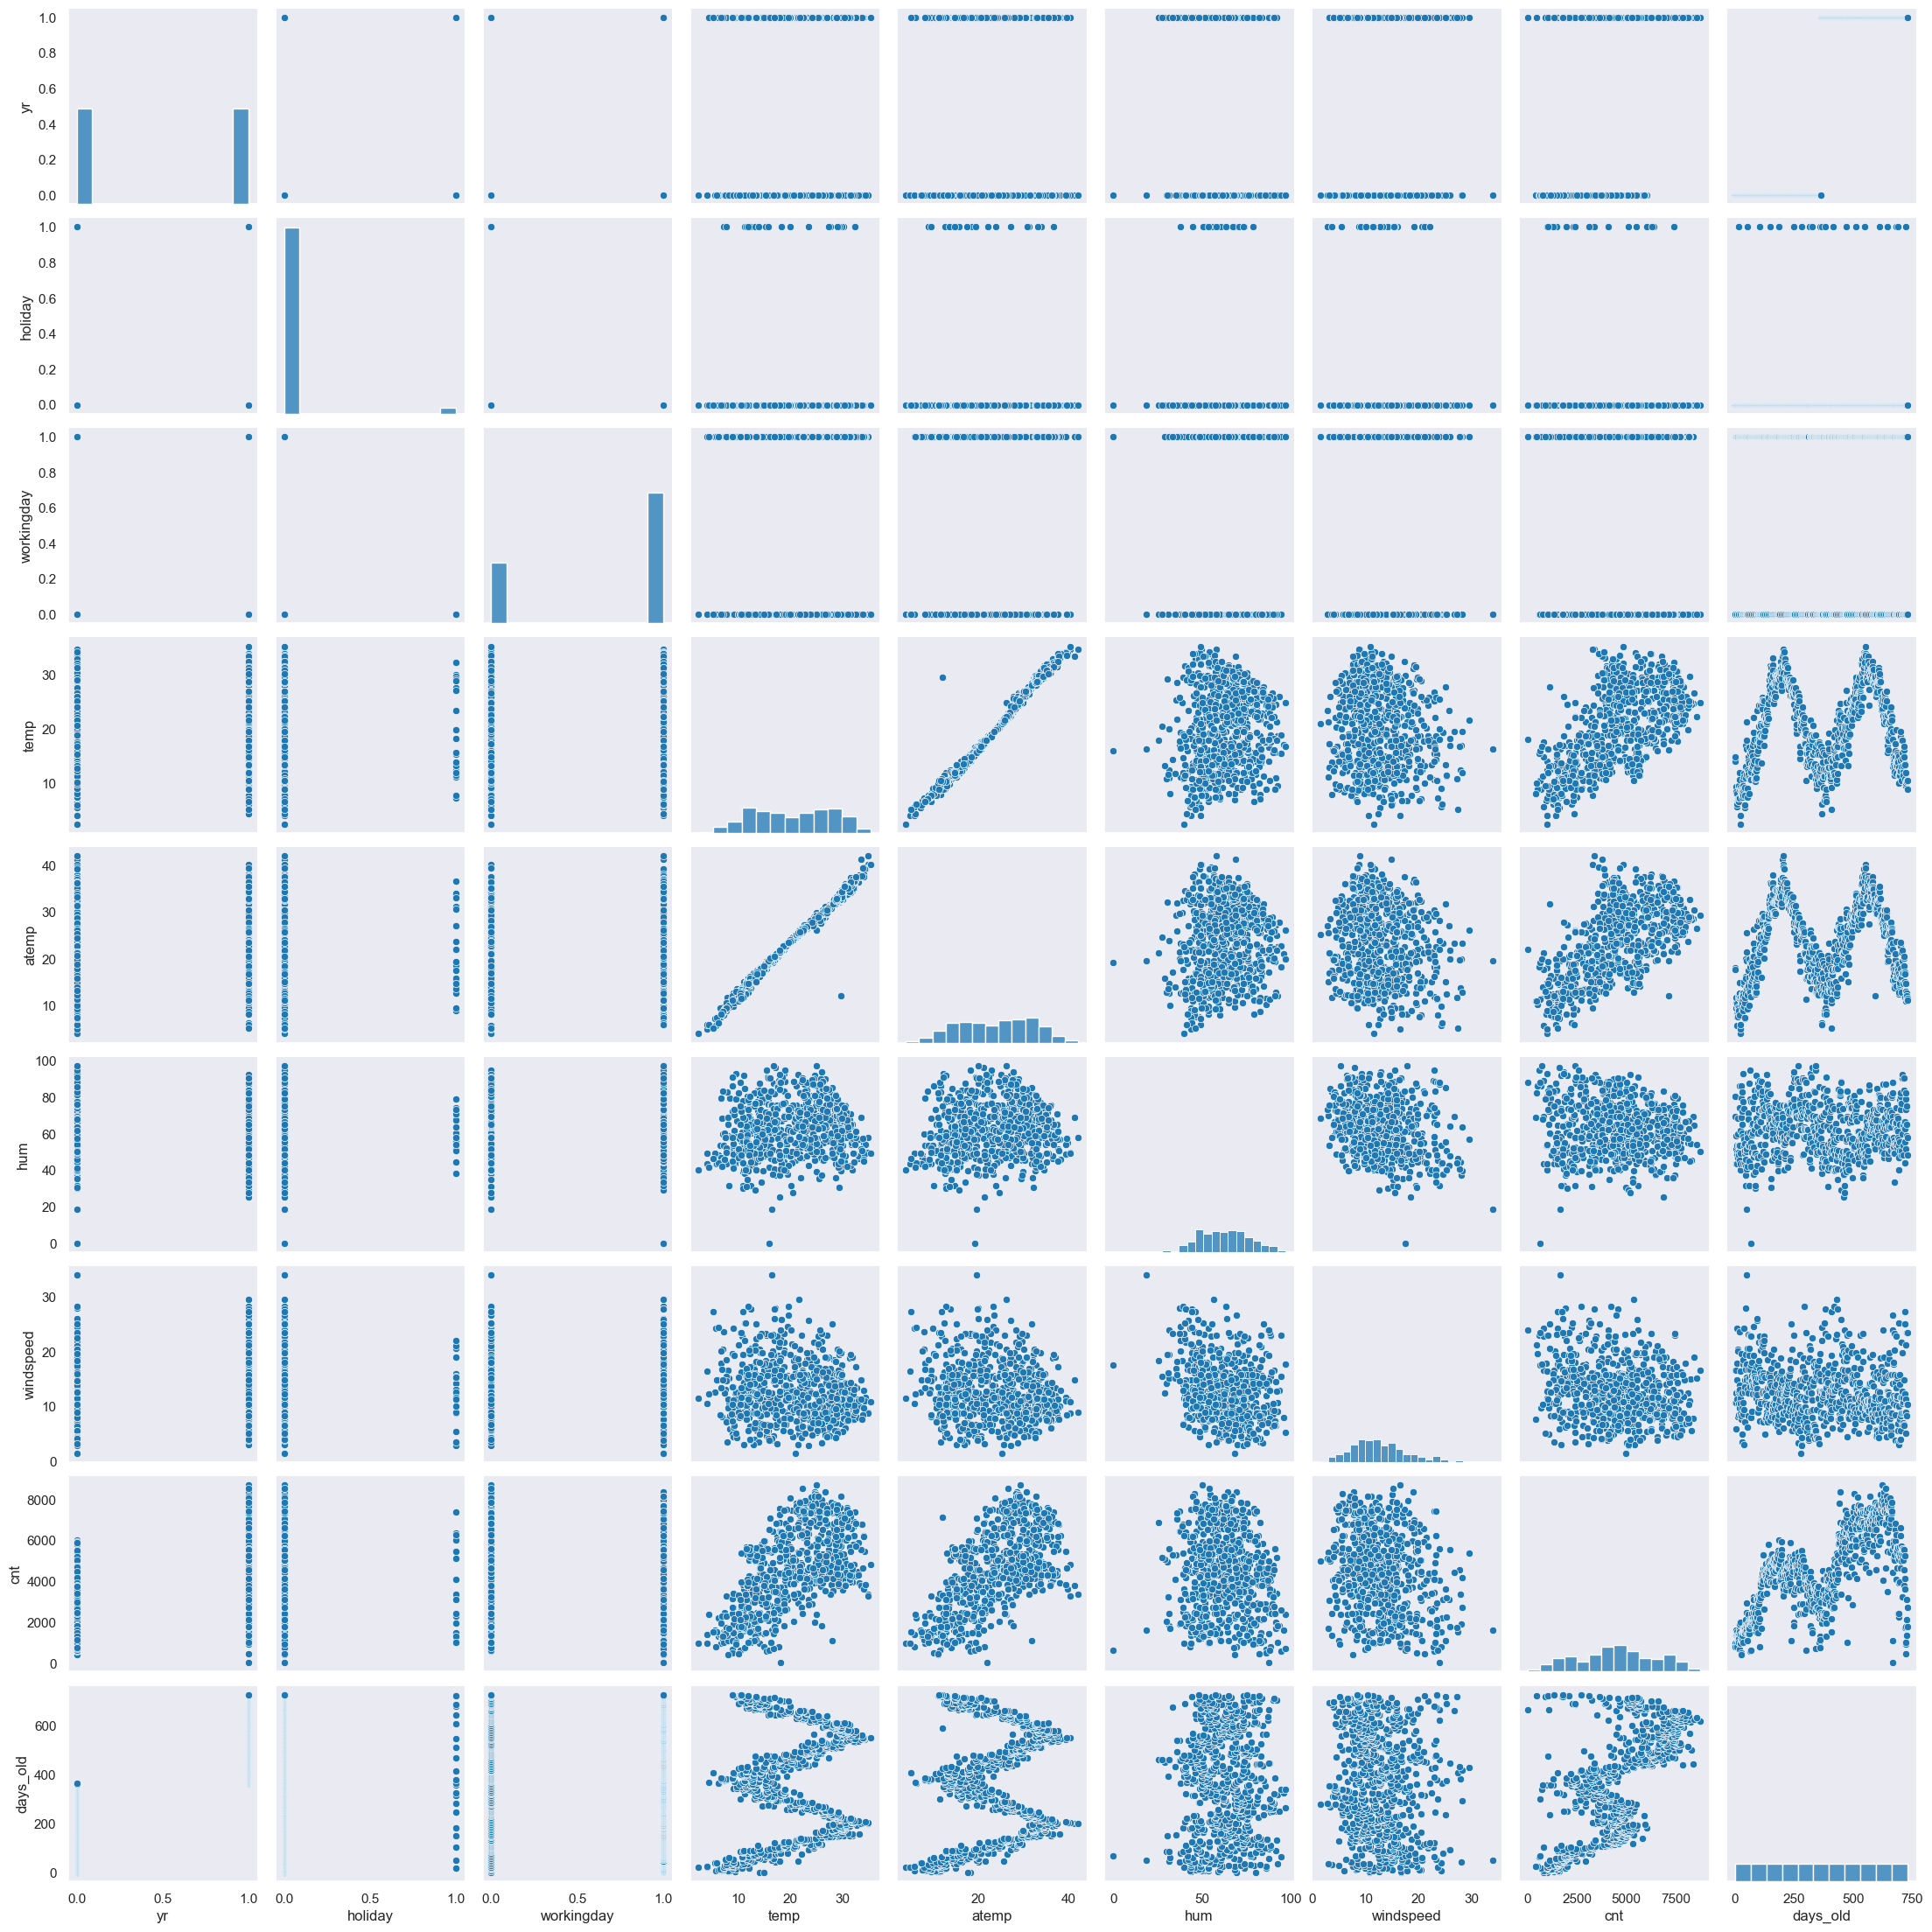

In [35]:
plt.figure(figsize=(22,16))
sns.pairplot(bikeSharing_df)
plt.show()

### Checking the continuous variables relationship with each other

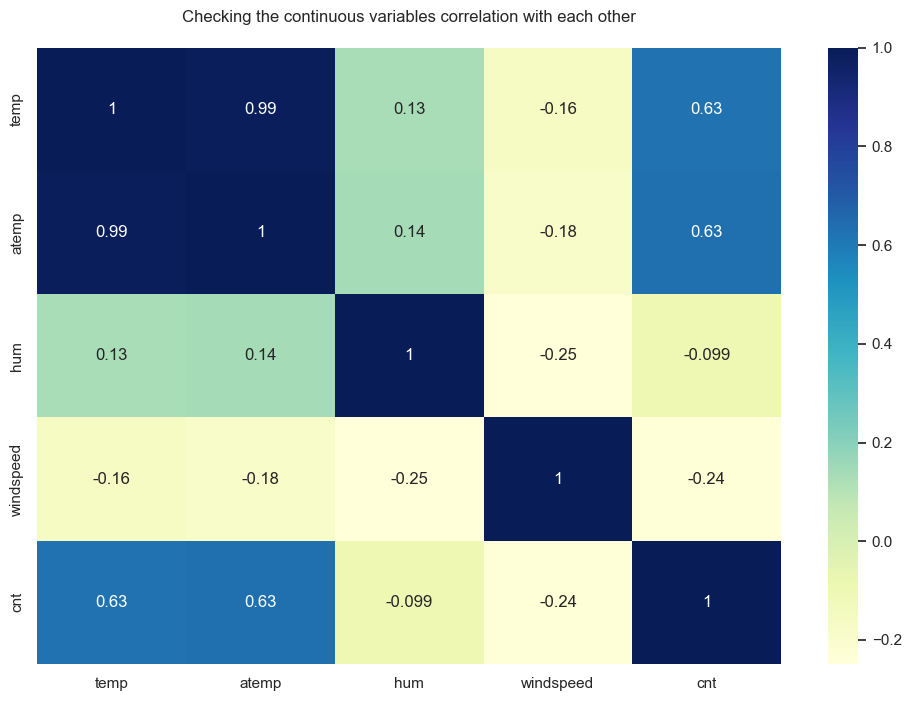

In [36]:
# Checking continuous variables relationship with each other
plt.figure(figsize = (12,8))
sns.heatmap(bikeSharing_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap="YlGnBu", annot = True)
plt.title("Checking the continuous variables correlation with each other\n")
plt.show()

### Observation:
Here we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

### Correlations for numeric variables

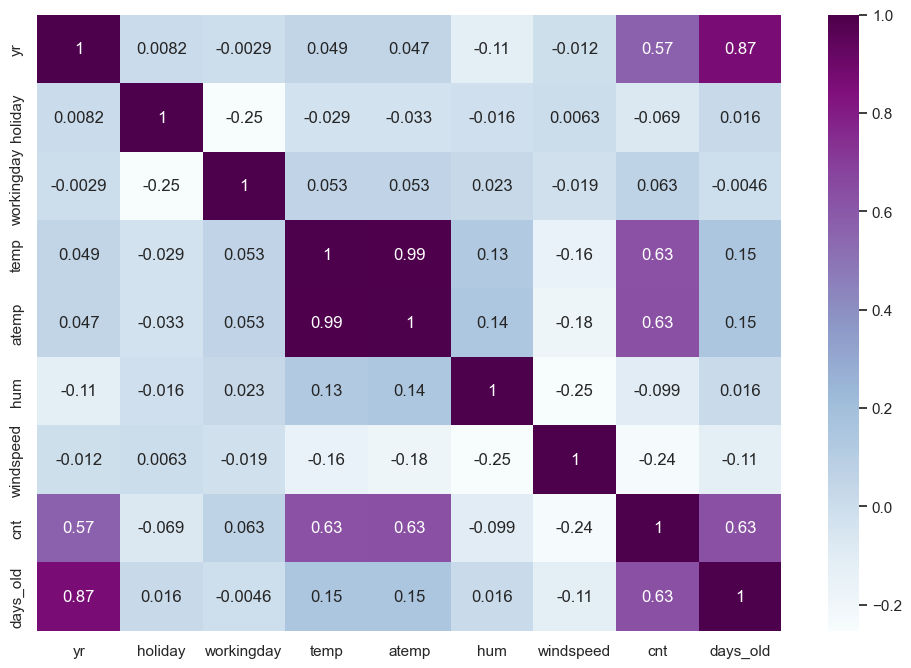

In [37]:
#Correlations for numeric variables
plt.figure(figsize = (12,8))
cor=bikeSharing_df.corr()
sns.heatmap(cor, cmap="BuPu", annot = True)
plt.show()

### 2.4 Draw Heatmap of correlation between variables

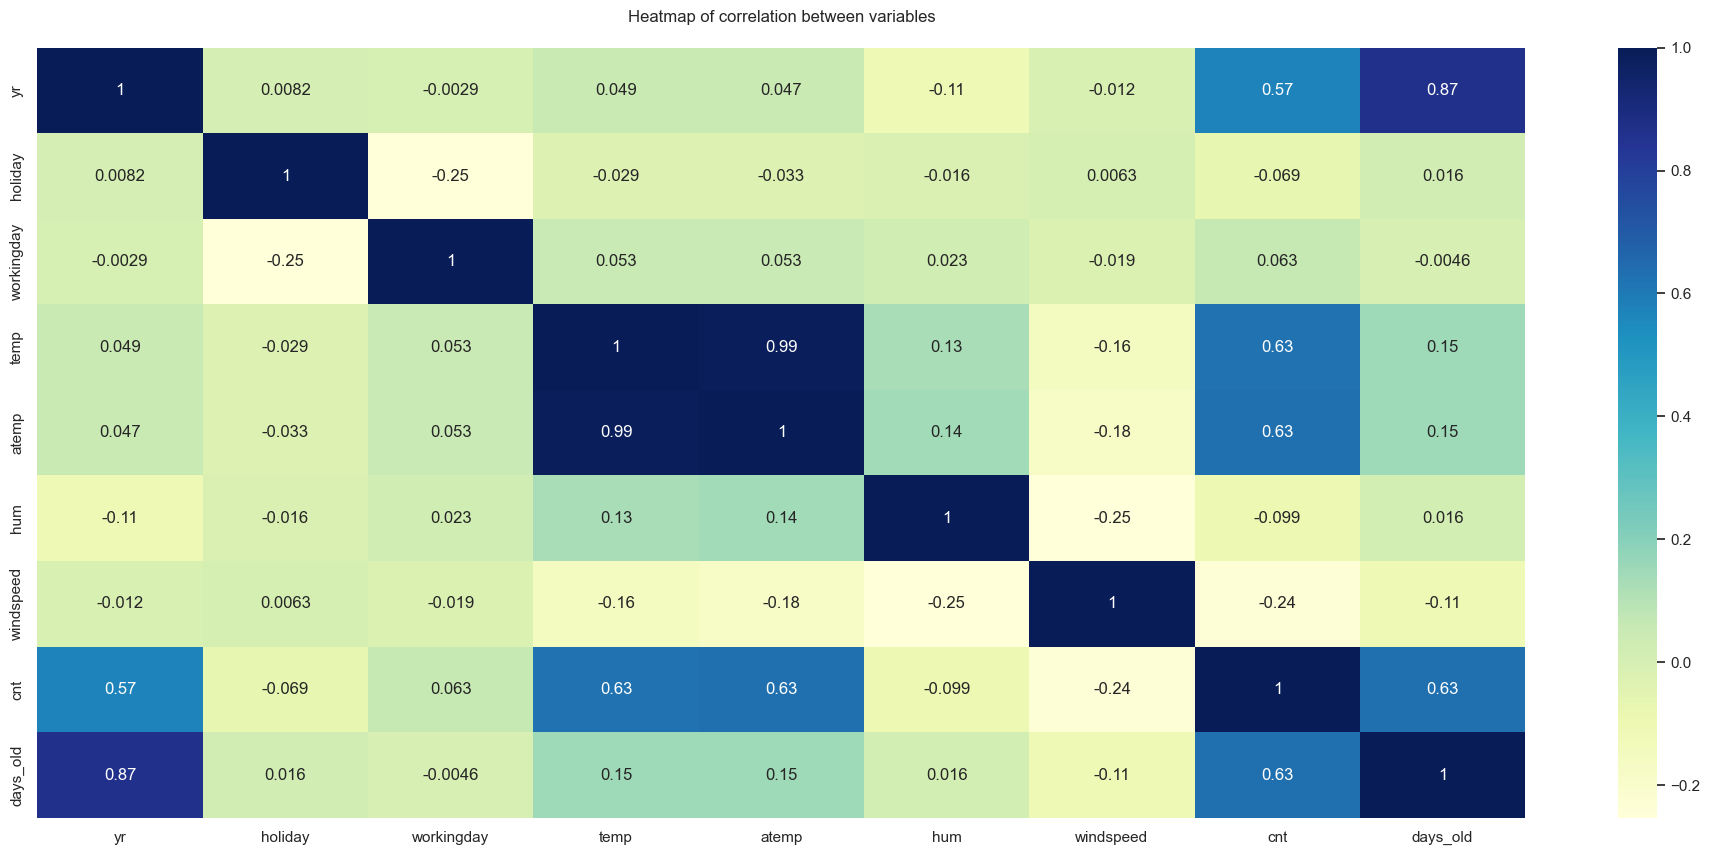

In [38]:
#Calculate Correlation
corr = bikeSharing_df.corr()
plt.figure(figsize=(24,10))
plt.title("Heatmap of correlation between variables\n")

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

### Observation:
- From the correlation map, temp, atemp and days_old seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
- We also see Target variable has a linear relationship with some of the  indeptendent variables. Good sign for building a linear regression Model.

### 2.5 Analysing Categorical Variabels with target variables

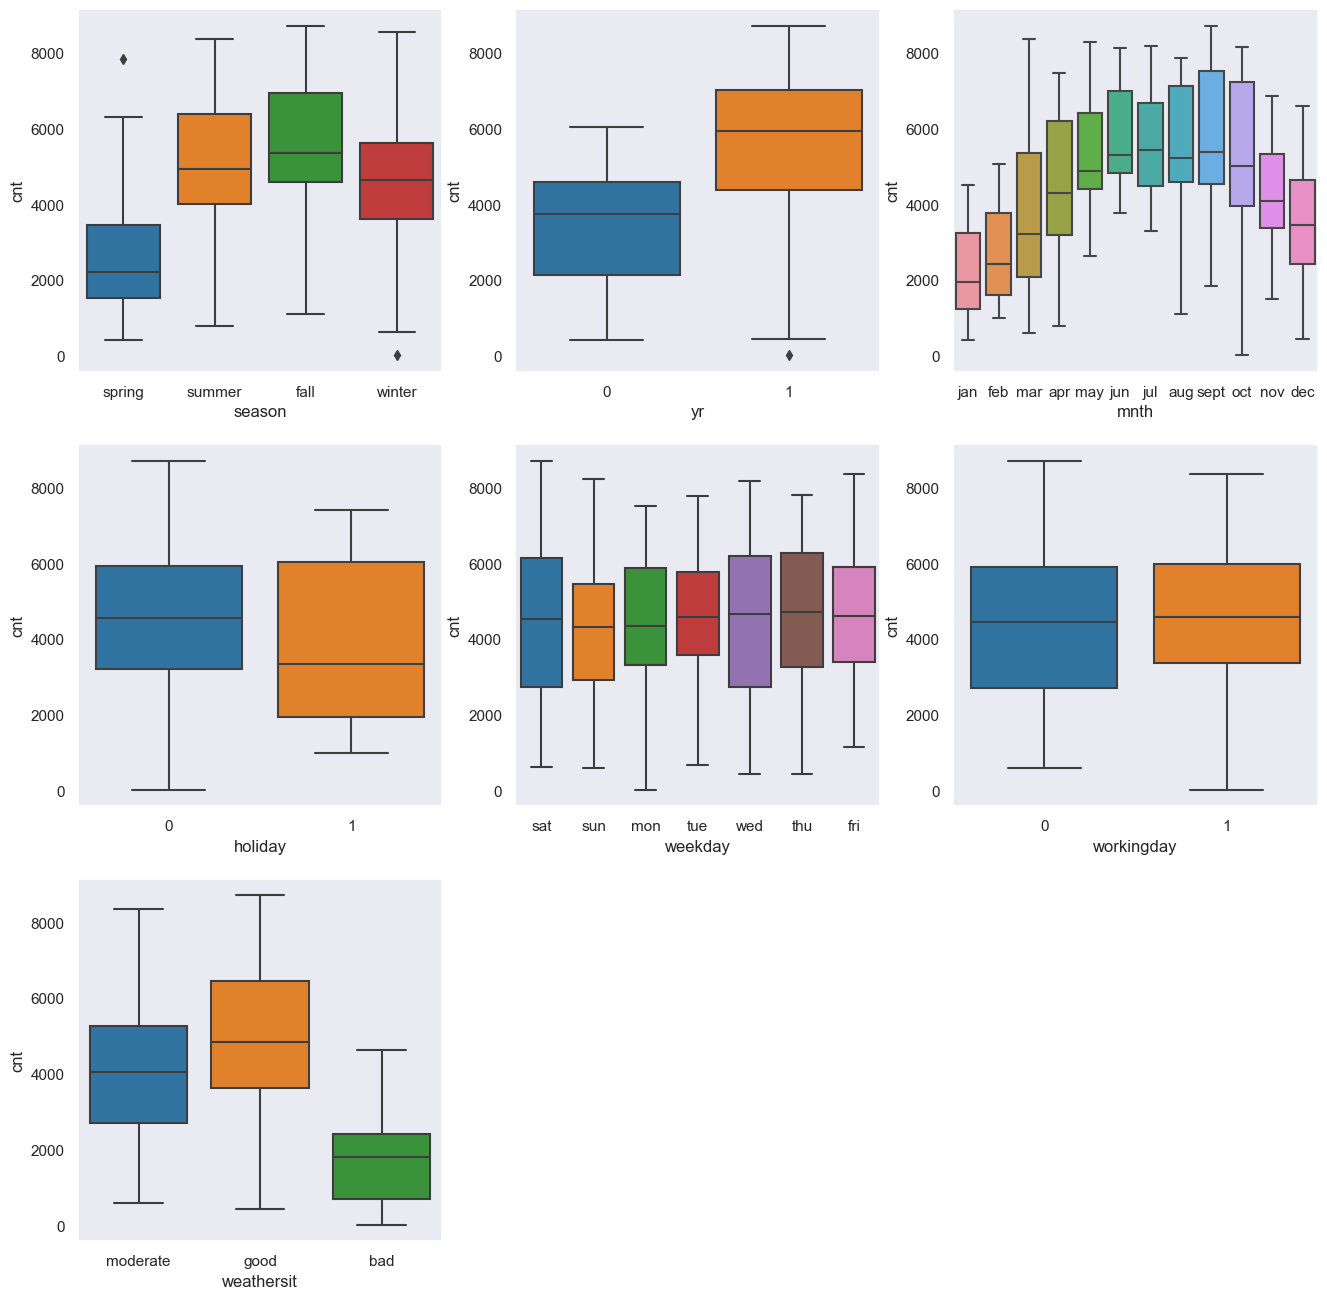

In [39]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(16, 16))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing_df, x=i[1], y='cnt')
plt.show()

### Observation:
  **Many insights can be drawn from the plots below:**

- Season: 3:fall has highest demand for rental bikes. For the variable season, we can clearly see that the category 3 : Fall, has the highest median, which shows that the demand was high during this season. It is least for 1: spring.
- I see that demand for next year has grown. The year 2019 had a higher count of users as compared to the year 2018.
- Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
- When there is a holiday, demand has decreased.
- The bike demand is almost constant throughout the week.
- The clear weathershit has highest demand. The count of total users is in between 4000 to 6000 (~5500) during clear weather.
- During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

### 2.6 Regplot Analysis of 'Count of total rental Bikes' vs 'Temperature in Celsius'

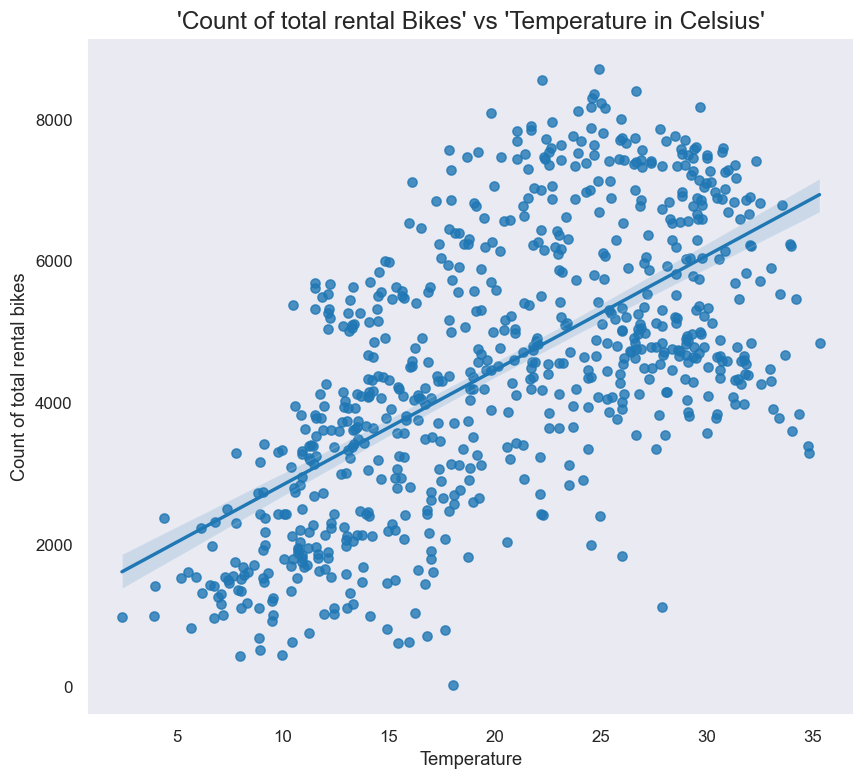

In [40]:
plt.figure(figsize=(9,8),dpi=110)
plt.title("'Count of total rental Bikes' vs 'Temperature in Celsius'",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.ylabel("Count of total rental bikes")
plt.show()

### Observation:
- Demand for bikes is positively correlated to temp.
- We can see that cnt is linearly increasing with temp indicating linear relation.

### 2.7 Regplot Analysis of 'Count of total rental Bikes' vs 'Humidity'

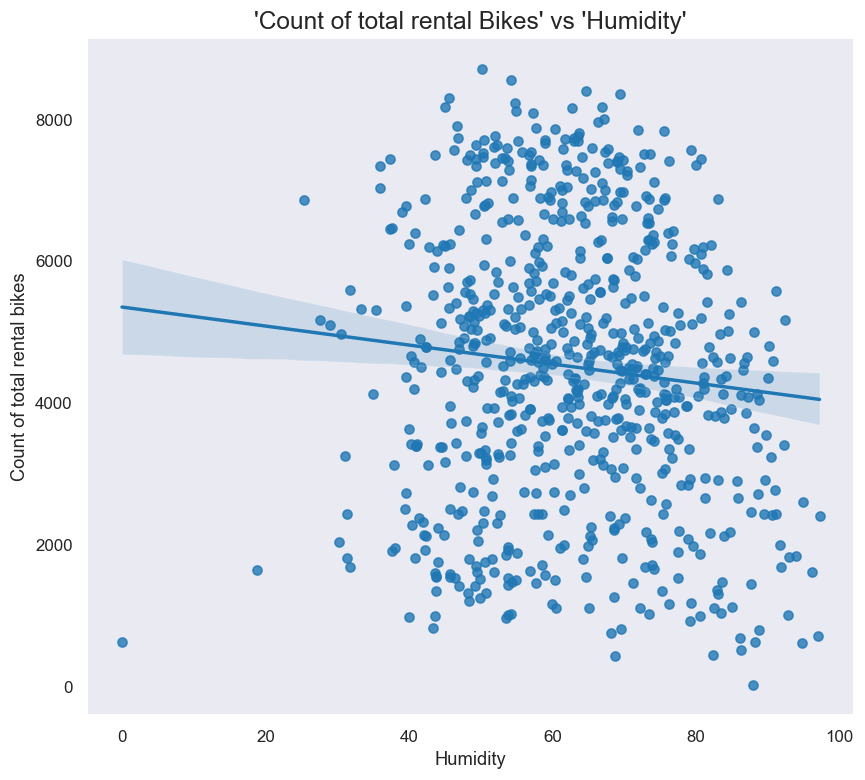

In [41]:
plt.figure(figsize=(9,8),dpi=110 )
plt.title("'Count of total rental Bikes' vs 'Humidity'",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.ylabel("Count of total rental bikes")
plt.show()

### Observation:
- Hum (Humidity) is values are more scattered around.
- Although we can see cnt (Count of total rental bikes) decreasing with increase in humidity.

### 2.8 Regplot Analysis of 'Count of total rental Bikes' vs 'Windspeed'

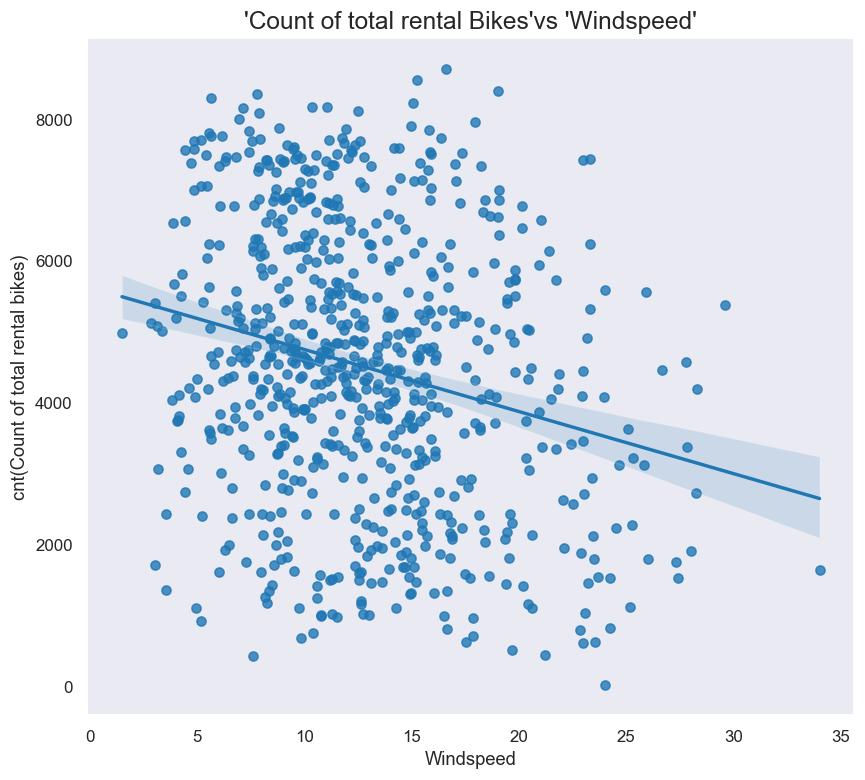

In [42]:
plt.figure(figsize=(9,8),dpi=110)
plt.title("'Count of total rental Bikes'vs 'Windspeed'",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="windspeed")
plt.xlabel("Windspeed")
plt.ylabel("cnt(Count of total rental bikes)")
plt.show()

### Observation:
- Windspeed is values are more scattered around.
- Although we can see cnt decreasing with increase in windspeed.

### 2.9 Correlation of numeric features:
Correlation of "Tempurature","Feeling temperature","Humidity","Windspeed"& "cnt(Count of total rental Bikes)"

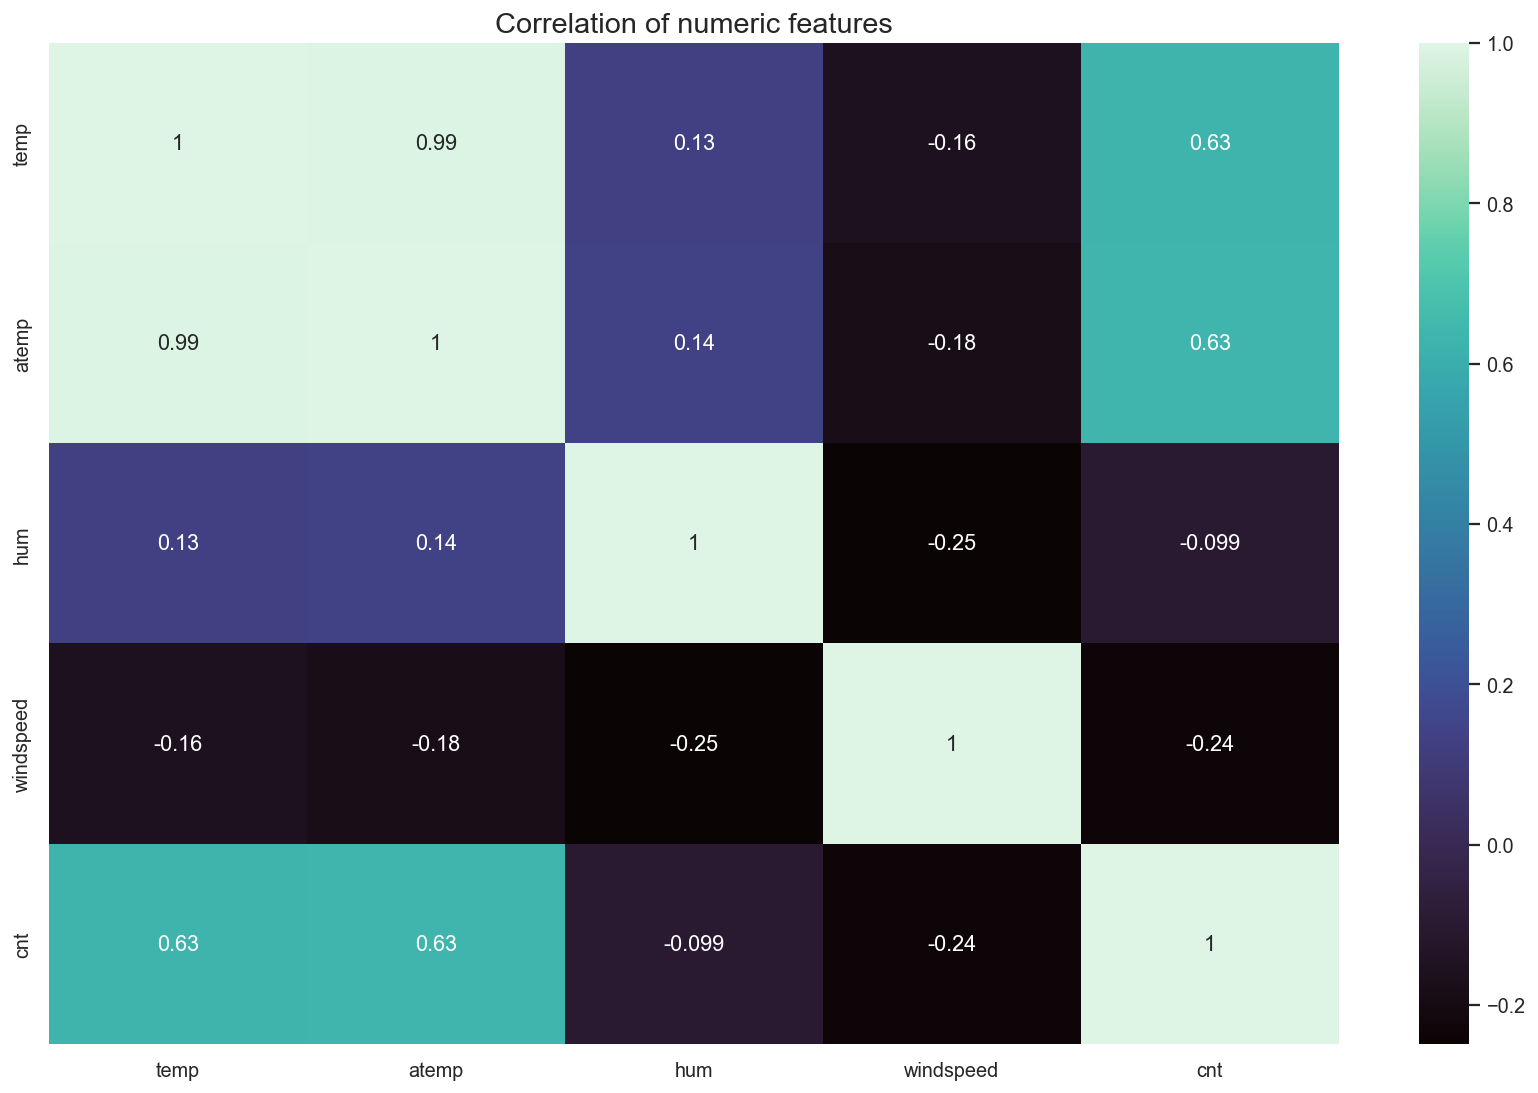

In [43]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(16,10),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bikeSharing_df[num_features].corr(),annot= True,cmap="mako")
plt.show()

### Observation:
- Temp(Tempurature) and Atemp(Feeling temperature) are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.
- Temp(Tempurature)and Atemp(Feeling temperature) also have high correlation with cnt(Count of total rental Bikes) variable.

In [44]:
bikeSharing_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


# <span style = 'color : green' > 3). Data Preparation for Linear Regression

## 3.1 Create dummy variables for all categorical variables

In [45]:
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["season","mnth","weekday"],drop_first=True)
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["weathersit"])

### Observation:
- Dropping the first columns as (p-1) dummies can explain p categories.
- In weathersit first column was not dropped so that we will not lose the info about severe weather situations.

## 3.2 Print columns after creating dummies

In [46]:
#Print columns after creating dummies
bikeSharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

## 3.3 Print few rows to inspect

In [47]:
#Print few rows to inspect
bikeSharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,1,0,1,0


In [48]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   days_old             730 non-null    int64  
 9   season_spring        730 non-null    uint8  
 10  season_summer        730 non-null    uint8  
 11  season_winter        730 non-null    uint8  
 12  mnth_aug             730 non-null    uint8  
 13  mnth_dec             730 non-null    uint8  
 14  mnth_feb             730 non-null    uint8  
 15  mnth_jan             730 non-null    uin

##### Now the data is converted to a clean format suitable for further analysis

# <span style = 'color : green' > 4). Model Building Prepration

## 4.1 Split Data into training and test Set

### Checking shape before splitting

In [49]:
# Checking shape before splitting
bikeSharing_df.shape

(730, 32)

### Train Set and Test Set split with 70:30 ratio where y to contain only target variable  & X is all remainign variable also our independent variables

In [50]:
#y to contain only target variable
y=bikeSharing_df.pop('cnt')

#X is all remainign variable also our independent variables
X=bikeSharing_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Inspect independent variables

In [51]:
#Inspect independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,1,0,1,0


### Checking shape and size for Train Set and Test set

In [52]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


### Rescaling the Features

Although scaling doesnot impact the linear model in the case of simple linear regression, however while performing multiple linear regression it might impact the model. As we can see that the value of the feature cnt has much higher values as compared to the other features like temp, atemp etc.So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.

## 4.2 Feature Scaling continuous variables

- To make all features in same scale to interpret easily

- Following columns are continous to be scaled temp,hum,windspeed

### Use Normalized scaler to scale & Fit and transform training set only

In [53]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

### Inspect stats from Training set after scaling

In [54]:
#Inspect stats from Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Inspect the Independent variables

In [55]:
#Inspect independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,1,0,1,0


## 4.3 Build a Model using RFE and Automated approach

### Use RFE to eliminate some columns

#### Build a Lienar Regression model using SKLearn for RFE

In [56]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

#### Cut down number of features to 15 using automated approach

In [57]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr, n_features_to_select=10)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

#### Columns selected by RFE and their weights

In [58]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 8),
 ('atemp', True, 1),
 ('hum', False, 3),
 ('windspeed', False, 2),
 ('days_old', False, 6),
 ('season_spring', True, 1),
 ('season_summer', False, 21),
 ('season_winter', False, 7),
 ('mnth_aug', False, 13),
 ('mnth_dec', False, 11),
 ('mnth_feb', False, 16),
 ('mnth_jan', False, 14),
 ('mnth_jul', False, 20),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 9),
 ('mnth_may', False, 10),
 ('mnth_nov', False, 12),
 ('mnth_oct', False, 4),
 ('mnth_sept', False, 5),
 ('weekday_mon', False, 18),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 22),
 ('weekday_tue', False, 17),
 ('weekday_wed', False, 19),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

## 4.4 Manual elimination

### Function to build a model using statsmodel api
- Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter

In [59]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

### Function to calculate VIFs and print them
- Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter

In [60]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

#### Print Columns selected by RFE. We will start with these columns for manual elimination

In [61]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'atemp', 'season_spring', 'weekday_sat',
       'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

#### Features not selected by RFE

In [62]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['temp', 'hum', 'windspeed', 'days_old', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

#### Taking 15 columns supported by RFE for regression

In [63]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

##### Now checking the Shape of RFE for regression

In [96]:
X_train_rfe.shape

(511, 15)

# <span style = 'color : green' > 5). Build Model

## 5.1 Model 1: 
### 5.1.1 Start with all variables selected by RFE
- Selected columns for Model 1 - all columns selected by RFE

In [65]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          4.52e-183
Time:                        14:37:55   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2373.1199    

### 5.1.2 Checking correlation:
- Checking correlation of features selected by RFE with target column.
- Also to check impact of different features on target.

<Axes: >

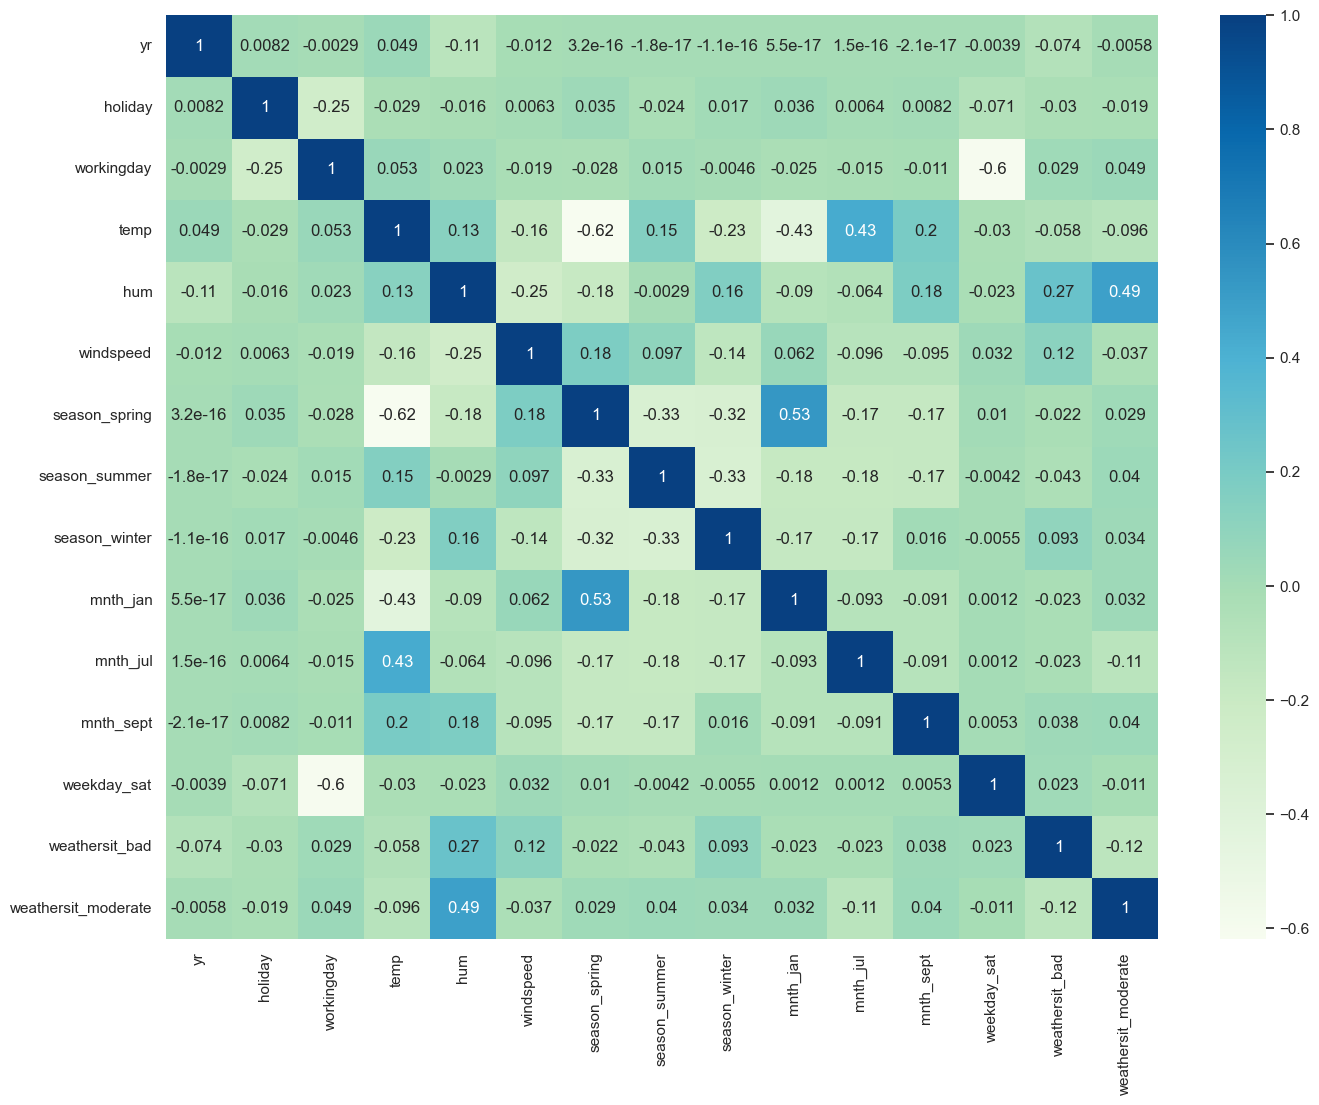

In [66]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (16,12))
sns.heatmap(bikeSharing_df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)


### Observation:
- **mnth_jan** has negative coefficient and is insignificant as it has high **P-value**.

## 5.2 Model 2: 
### 5.2.1 
- Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high P-value

In [67]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          3.59e-184
Time:                        14:37:56   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2357.7484    

### Observation:
- After Dropping the variable mnth_jan all the columns have p-value > .05
- Now above we can see that the hum as it has negative coefficient and is insignificant as it has high VIFs of 26.96

## 5.3 Model 3: 
### 5.3.1 All the columns have p-value > .05 so checking VIFs
- **hum** as it has negative coefficient and is insignificant as it has high VIFs of 26.96.
- Dropping the variable hum as it has negative **coefficient** and is insignificant as it has high **VIFs**.

In [68]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high VIFs
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          1.46e-181
Time:                        14:37:56   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1524.3398    

### Observation:
- After Dropping the variable **hum** we re-vaildate the variables and found that the variable **holiday** has negative coefficient and is insignificant as it has high p-value as well.

## 5.4 Model 4: 
### 5.4.1 
- Dropping the variable 'holiday' as it has negative coefficient and is insignificant as it has high p-value

In [69]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          4.56e-182
Time:                        14:37:56   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1458.3161    

### Observation:
- After Dropping the variable **holiday** we re-vaildate the variables and found that the variable **mnth_jul** has negative coefficient and is insignificant as it has high p-value as well.

## 5.5 Model 5: 
### 5.5.1 
- Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value

In [70]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          1.57e-182
Time:                        14:37:56   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1392.1476    

### Observation:
- After Dropping the variable **mnth_jul** we re-vaildate the variables and found that the variable **temp** has negative coefficient and is insignificant as it has high p-value  as well.

## 5.6 Model 6: 
### 5.6.1 
- Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value.

In [71]:
# Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     163.3
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          1.84e-150
Time:                        14:37:56   Log-Likelihood:                -4222.0
No. Observations:                 511   AIC:                             8466.
Df Residuals:                     500   BIC:                             8513.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4634.1026    

## 5.7 Model 7: 
### 5.7.1 
- After Dropping the variable **temp** we re-vaildate the variables and found that month **July** with **spring(season_spring)** were highly correlated. So trying to replace **July as mnth_jul** with **spring(season_spring)** as both were highly correlated.

In [72]:
## Trying to replace July as mnth_jul with spring(season_spring) as both were highly correlated.

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     80.06
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           3.93e-97
Time:                        14:37:56   Log-Likelihood:                -4348.4
No. Observations:                 511   AIC:                             8719.
Df Residuals:                     500   BIC:                             8765.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2851.5231    

## 5.8 Model 8: 
### 5.8.1
- Removing **windspeed** with **spring(season_spring)** as windspeed was highly correlated with temp.

In [73]:
# Removing windspeed with spring as windspeed was highly correlated with temp
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     154.6
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          5.90e-146
Time:                        14:37:56   Log-Likelihood:                -4232.7
No. Observations:                 511   AIC:                             8487.
Df Residuals:                     500   BIC:                             8534.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4162.3897    

## 5.9 Model 9: 
### 5.9.1
- Now adding the weekend **"Sunday"(weekday_sun)** which was dropped during **RFE** instead of **Saturday(weekday_sat)**.

In [74]:
# using the weekend "Sunday" which was dropped during RFE instead of Saturday.

cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     152.6
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          6.32e-145
Time:                        14:37:56   Log-Likelihood:                -4235.1
No. Observations:                 511   AIC:                             8492.
Df Residuals:                     500   BIC:                             8539.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4479.8636    

## 5.10 Model 10: 
### 5.10.1
- Adding **temp** and removed **'season_summer'** and **'workingday'**.

In [75]:
# adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          2.33e-179
Time:                        14:37:56   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

### Observation:
- Here VIF seems to be almost accepted. p-value for all the features is  almost 0.0 and R2 is 0.821 
- Let us select Model 10 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 
- Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

### 5.10.2 Build a model with all columns to select features automatically

In [76]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

### 5.10.3 Let us build the finalmodel using sklearn

In [97]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1849.3111141436225 [ 2001.88568746 -1170.12801426  -482.89359595   494.76805882
   483.00061976  -335.8335287  -2305.32363933  -665.38449026
  3917.73381585]


# <span style = 'color : green' > 6). Model Evaluation

## 6.1 Residucal Analysis

In [78]:
y_train_pred = lr.predict(X_train[cols])

### 6.1.1 Plot a histogram of the error terms for train Set

In [79]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred, color='green')
    plt.title('Error Terms')
    plt.xlabel('Errors')

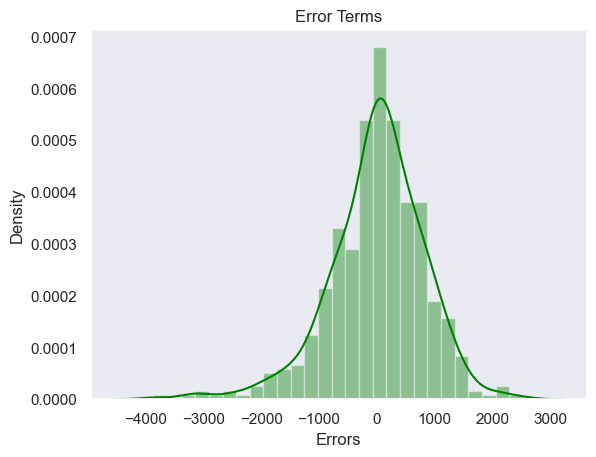

In [80]:
plot_res_dist(y_train, y_train_pred)

### Observation:
- Errors are normally distribured here with mean 0. So everything seems to be fine.

### 6.1.2 Cross-verifying the above conclusion using a qq-plot as well:

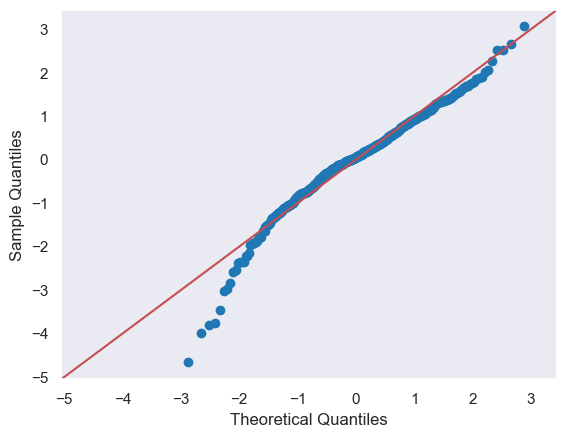

In [81]:
# Plot the qq-plot of the error terms
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

### Conclusion:
- Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed .

### 6.1.3 Actual vs Predicted analysis

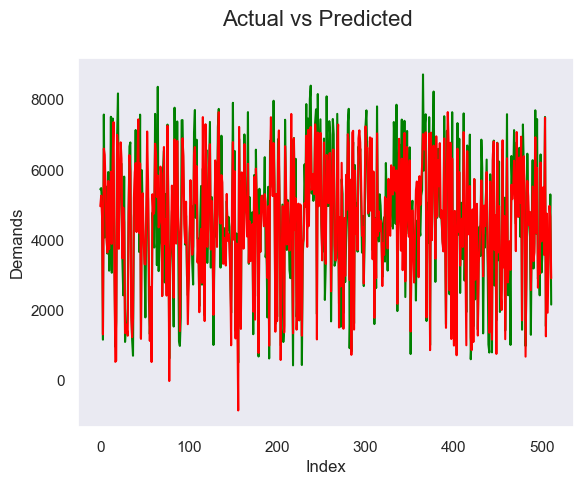

In [82]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="green")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 16)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

### Observation:
- Actual and Predicted result following almost the same pattern so this model seems ok.

### 6.1.4 Error Terms Analysis for Train Set

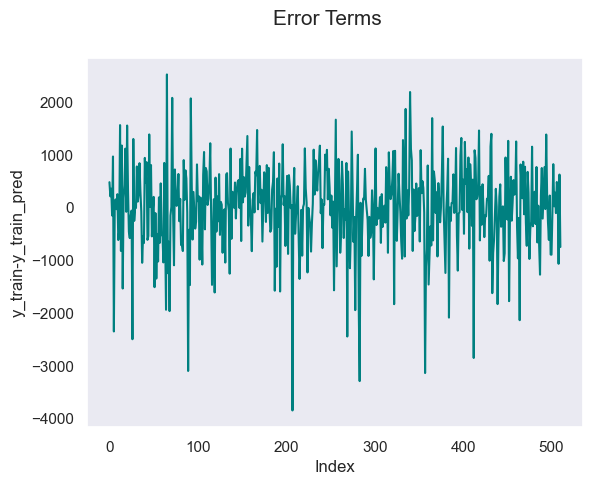

In [83]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred, color="Teal")
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

### Observation:
- Here,If we see the error terms are independent of each other.

### 6.1.5 Print the R-squared Value for Train Set

In [84]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8185359364498817

### Observation:
- R2 Same as we obtained for our final model.

## 6.2 Linearity Check

### 6.2.1 scatter plot for the analysis  for Train Set

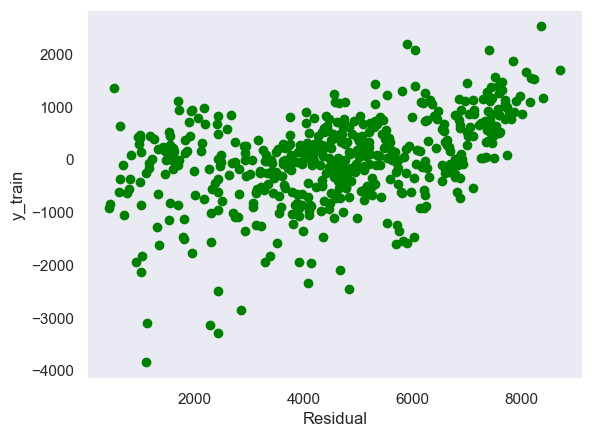

In [85]:
# scatter plot for the analysis
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual, color="green")
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

## 6.3 Predict values for test data set

### 6.3.1 
- Analysis the below Scale variables in **X_test**. Test data to be **Transformed** only, no fitting

In [86]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

### 6.3.2 Take the Columns from our final model to Predict the values for Test data Set

In [87]:
#Columns from our final model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

## 6.4 R-Squared value for Test set predictions

- Find out the R squared value between test and predicted test data sets.

In [88]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8159036088393238

## 6.5 Homoscedacity

### Observation:
- R2 value for predictions on test data (0.815) is almost same as R2 value of train data(0.818). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

## 6.6 Analysis Plotting y_test and y_test_pred to understand the spread in Test Set

Text(0, 0.5, 'y_test_pred')

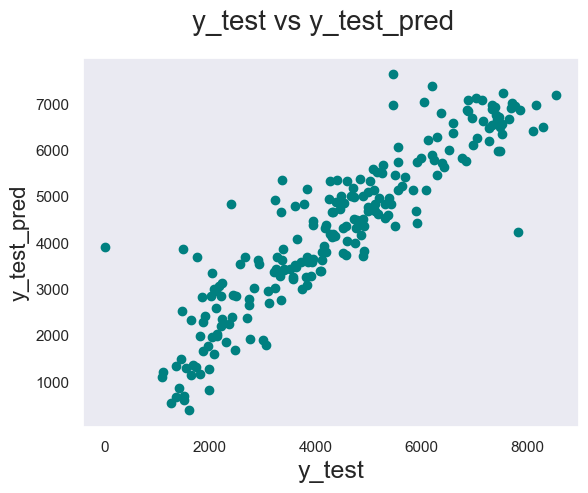

In [89]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, color='Teal')
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

### Observation:
- We can observe that variance of the residuals (error terms) is constant across predictions.  i.e error term does not vary much as the value of the predictor variable changes.

## 6.7 Plot Test vs Predicted test values

### 6.7.1
- To function to plot **Actual** vs **Predicted** taking the Actual and Predicted values as input along with the scale and Title to indicate which data

In [90]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

### 6.7.2 Analysis the Plot Actual vs Predicted for Test Data Set

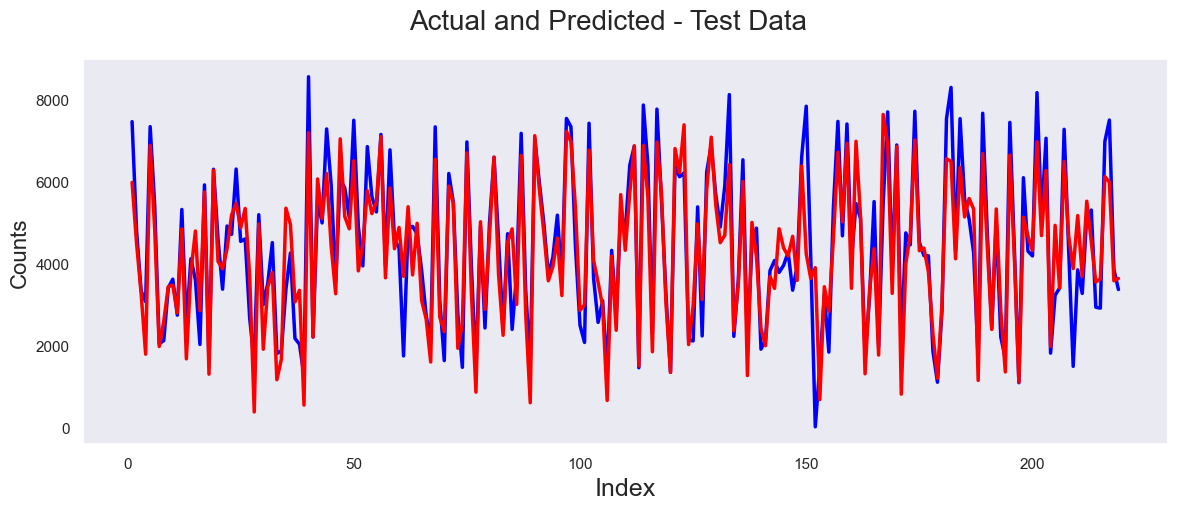

In [91]:
#Plot Actual vs Predicted for Test Data Set
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

### Observation:
- As we can see predictions for test data Set is very close to actuals.

## 6.8 Plot Error Terms for Test Data Set

### 6.8.1 Error Terms for Test Set

In [92]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="green", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

### 6.8.2 Analysis the Plot error terms for Test Data Set

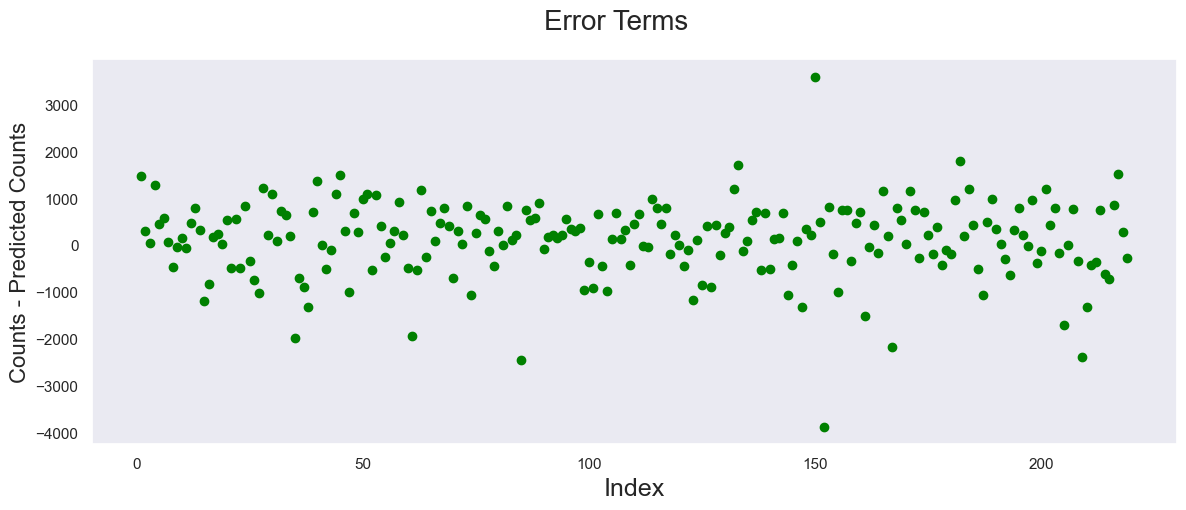

In [93]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

### Observation:
- As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

# <span style = 'color : green' > 7). Making Predictions

## 7.1 Checking data before scaling

In [98]:
# Checking data before scaling
bikeSharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,1,0,1,0


## 7.2 Intrepretting the Model

### 7.2.1 
- Let us go with interpretting the RFE with Manual model  approach using statsmodel to interpret it as we give more importance to imputation

In [95]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          2.33e-179
Time:                        14:37:58   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

### 7.2.2 Interepretation of Results


### <span style = 'color : green' > Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during Spring.
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.
- With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
- During the Winter season the demand rises, hence it should be well prepared to meet the high demand
- **Casual and Registered Users:** While most casual users are likely to be tourists whose rental count is high during non working days, most registered users are most likely city natives whose rental count is high during working days
- **Hour of the day:** Bike rental count is mostly correlated with the time of the day. As indicated above, the count reaches a high point during peak hours on a working day and is mostly uniform during the day on a non-working day   
- **Working or Non-working Day** We see 2 rental patterns across the day in bike rentals count - first for a `Working Day` where  the rental count high at peak office hours (8am and 5pm) and the second for a `Non-working day` where rental count is more or less uniform across the day with a peak at around noon. 
    
#### Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.


## <span style = 'color : green' > Final Conclusion:

### <span style = 'color : green' > We explored several types of informations that influence bike rental count. Hence, it can be clearly concluded that the Significant variables to predict the demand for shared bikes are:
- From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 81% of bike demand.
- **Holiday & Sunday**: We see 2 rental patterns across the day in bike rentals count - first for a Working Day where the rental count high at peak office hours (8am and 5pm) and the second for a Non-working day where rental count is more or less uniform across the day with a peak at around noon.
- temp (**Temperature**): People generally prefer to bike at moderate to high temperatures.
- hum **(Humidity**): With increasing humidity, we see decrease in the number of bike rental count.
- **windspeed**
- **Season**
- months(January, July, September, November, December) should be considered by the company as they have a higher demand as compared to other months.
- **Year (2019)**: The year 2019 had a higher count of users as compared to the year 2018. Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- **weathersit( Light Snow, Mist + Cloudy):** As one would expect, we see highest number of bike rentals on a **clear day(clear_partlycloudy)** and the lowest on a **snowy or rainy day**.
